In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [12]:
open_access_data = pd.read_csv("unrestricted_juzhuoxuan_12_4_2024_1_36_25.csv")
restricted_data = pd.read_csv("RESTRICTED_juzhuoxuan_12_5_2024_14_20_0.csv")
subject_data = open_access_data.merge(restricted_data, how = 'inner', on = 'Subject')

folder = 'HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2'
brain_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
brain_data = {}

for filename in brain_files:
    subject_id = int(filename[:6])
    file_path = os.path.join(folder, filename)
    subject_brain_data = np.loadtxt(file_path)
    brain_data[subject_id] = subject_brain_data

brain_data_df = pd.DataFrame({
    'Subject': list(brain_data.keys()),
    'Brain_Data': list(brain_data.values())  # (4800, 15) arrays
})
brain_data_df

data = subject_data.merge(brain_data_df, on='Subject', how='inner')


In [13]:
data.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,Brain_Data
0,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[59.028, -44.695, 18.952, 73.027, 13.956, 12...."
1,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,"[[-12.084, -37.572, 30.914, -42.308, 47.674, 6..."
2,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0,"[[-78.361, -25.041, 69.902, -47.022, 76.928, 9..."
3,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[-60.423, -97.935, -97.615, 18.661, -116.99, ..."
4,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,"[[-33.338, -52.12, -201.83, 9.8806, 24.688, 41..."


In [14]:
data["Handedness_Cat"] = data["Handedness"].apply(lambda x: "Left" if x < 0 else "Right")

In [15]:
hand_data = data[["Subject", "Gender", "Race", "Handedness", "Handedness_Cat"]]
hand_data

,Subject,Gender,Race,Handedness,Handedness_Cat
0,100206,M,White,65,Right
1,100307,F,White,95,Right
2,100408,M,White,55,Right
3,100610,M,White,85,Right
4,101006,F,Black or African Am.,90,Right
...,...,...,...,...,...
998,992673,F,White,70,Right
999,992774,M,White,100,Right
1000,993675,F,White,85,Right
1001,994273,M,White,60,Right


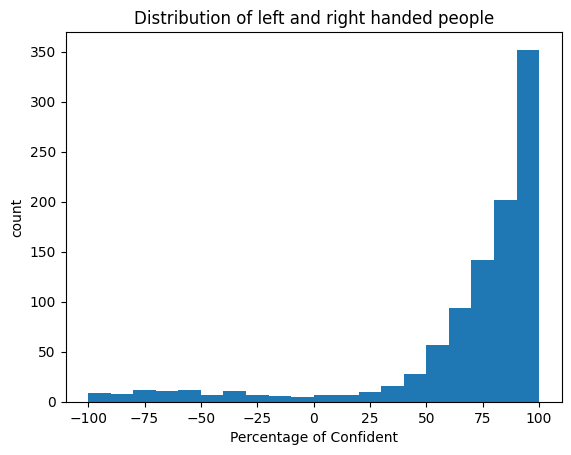

In [16]:
plt.hist(hand_data["Handedness"], bins = 20)
plt.xlabel("Percentage of Confident")
plt.ylabel("count")
plt.title("Distribution of left and right handed people")
plt.show();

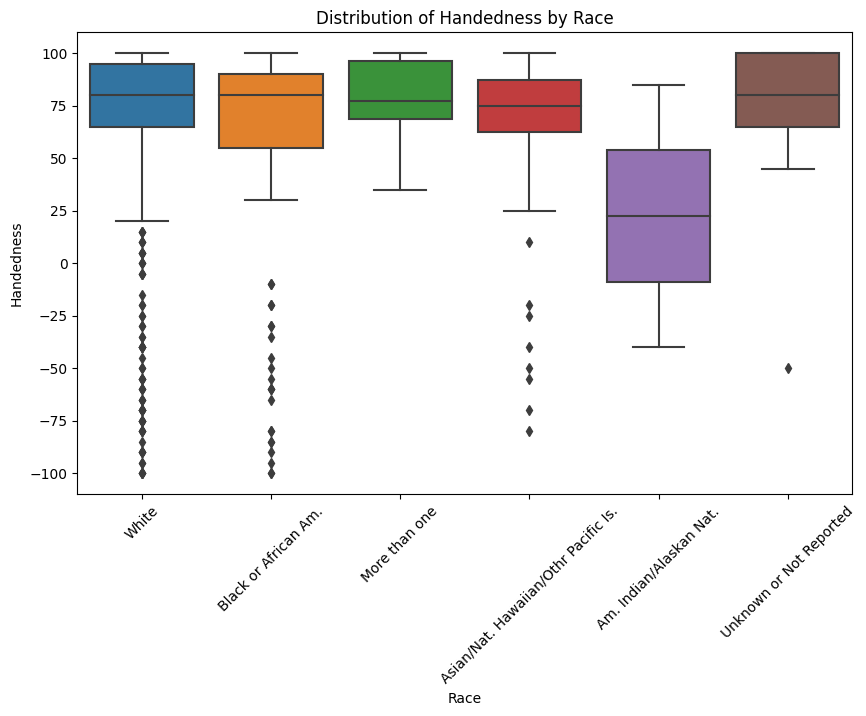

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hand_data, x='Race', y='Handedness')
plt.title("Distribution of Handedness by Race")
plt.xlabel("Race")
plt.ylabel("Handedness")
plt.xticks(rotation=45)
plt.show()

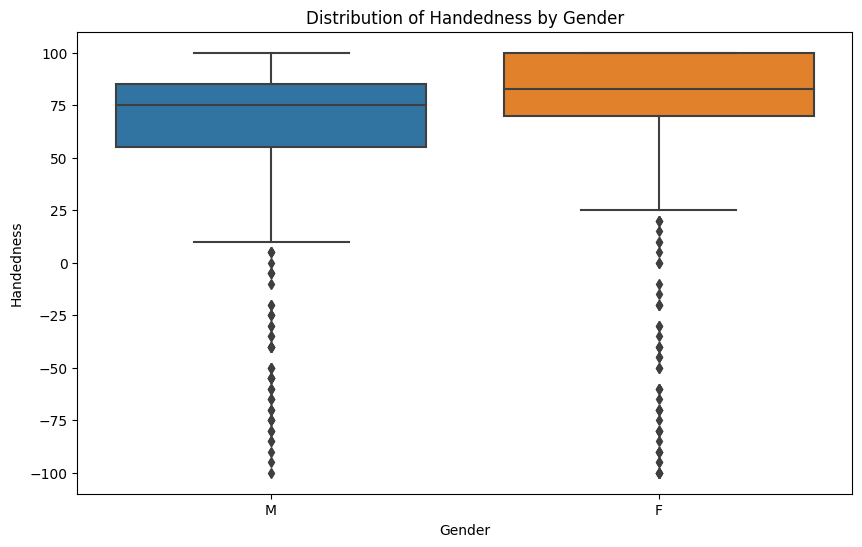

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hand_data, x='Gender', y='Handedness')
plt.title("Distribution of Handedness by Gender")
plt.xlabel("Gender")
plt.ylabel("Handedness")
plt.show()

In [19]:
hand_data.groupby(["Gender", "Handedness"])[["Subject"]].count()

Subject
Gender Handedness         
F      -100              5
       -95               2
       -90               4
       -85               1
       -80               4
...                    ...
M       80              70
        85              30
        90              36
        95              26
        100             51

[77 rows x 1 columns]

In [20]:
hand_data.groupby(["Gender", "Handedness_Cat"])[["Subject"]].count()

Subject
Gender Handedness_Cat         
F      Left                 40
       Right               494
M      Left                 48
       Right               421

### Correlation Matrix

#### one example

In [23]:
test_data = data["Brain_Data"][0]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


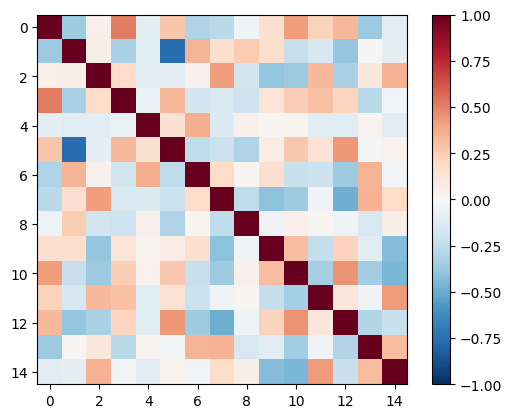

In [25]:
plt.figure()
plt.imshow(np.corrcoef(test_data.T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
plt.colorbar()
plt.show()


try for all

In [31]:
correlation_matrix_list = []
for i in range(data.shape[0]):
    person = data["Brain_Data"][i]
    #get matrix
    person_matrix = np.corrcoef(person.T)
    #append to list
    correlation_matrix_list.append(person_matrix)
#append to column
data["corrlation_matrix"] = correlation_matrix_list

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


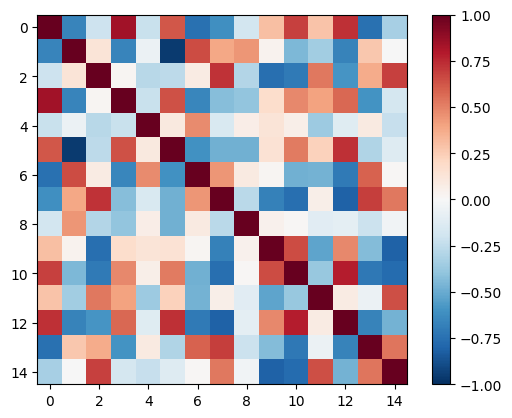

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


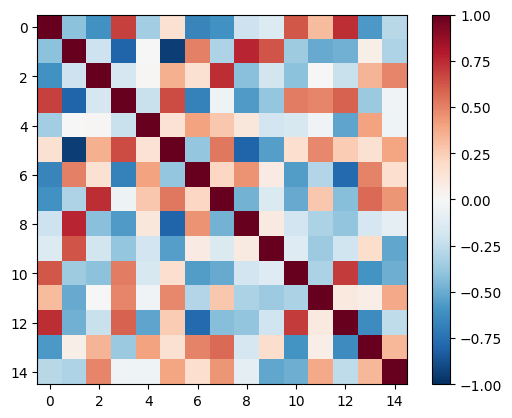

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


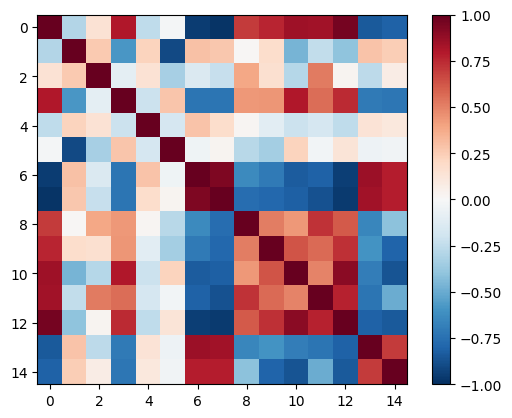

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


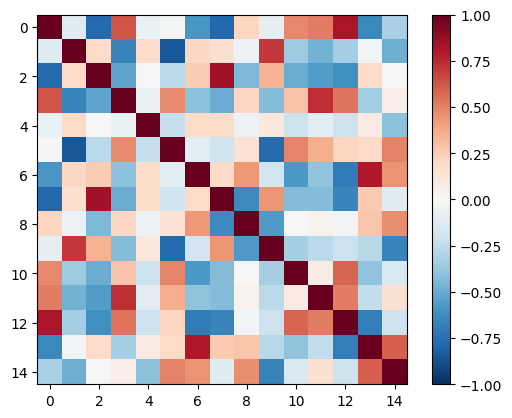

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


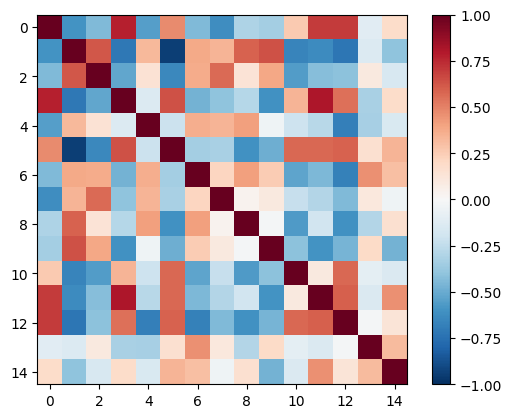

In [32]:
# plot first 5
for i in range(5):
    plt.figure()
    plt.imshow(np.corrcoef(correlation_matrix_list[i].T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
    plt.colorbar()
    plt.show()


In [34]:
data.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,Brain_Data,Handedness_Cat,corrlation_matrix
0,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[59.028, -44.695, 18.952, 73.027, 13.956, 12....",Right,"[[1.0, -0.35538986977870224, 0.048736196239782..."
1,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,"[[-12.084, -37.572, 30.914, -42.308, 47.674, 6...",Right,"[[1.0, -0.25960808719354656, -0.37115575575105..."
2,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,5.0,0.0,0.0,1.0,1.0,2.0,4.0,"[[-78.361, -25.041, 69.902, -47.022, 76.928, 9...",Right,"[[1.0, -0.12336657144262286, 0.065446074468723..."
3,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[-60.423, -97.935, -97.615, 18.661, -116.99, ...",Right,"[[1.0, -0.026741074832469593, -0.4913905681975..."
4,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,0.0,0.0,0.0,1.0,0.0,2.0,5.0,"[[-33.338, -52.12, -201.83, 9.8806, 24.688, 41...",Right,"[[0.9999999999999999, -0.27602003404294273, -0..."
